<a href="https://colab.research.google.com/github/AyanBhardwaj06/Ayan_projects/blob/main/CS496_UGP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS496 UGP 1

*Jiyanshu Dhaka*
*(220481)*

*Ayan Bhardwaj*
*(220257)*


# Integer Linear Programming

to check if given number of red , green ,blue color cell can be arranged to fit within square grid with linear constraints.

R+G+B= (dimension)^2  

we can input custom linear constraints of form aR + bG + cB <= d.


from wikipedia, ILP cannonical form is :

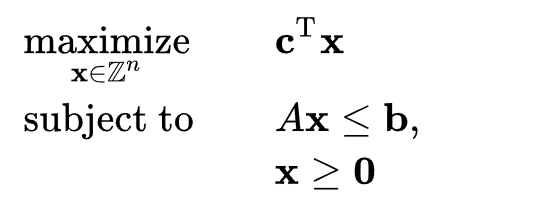

so, we use integer linear programming to check if it is possible to satisfy the constraint.

In [ ]:
from scipy.optimize import linprog

def can_fit_colors():
    """
    Check if the given [R, G, B] can fit into a square grid with constraints.

    Returns:
        str: 'YES' if the configuration is possible, otherwise 'NO'.
    """
    # Take inputs for the grid size and color counts
    grid_size = int(input("Enter the dimension of the square grid: "))
    R, G, B = map(int, input("Enter the counts of R, G, B (space-separated): ").replace(',', ' ').split())

    total_cells = grid_size ** 2

    # Ensure the total matches the grid size
    if R + G + B != total_cells:
        return "NO: The sum of R, G, and B does not equal the total grid cells."

    print("Define constraints:")
    print("1. Total cells constraint: R + G + B must equal total_cells.")
    print("2. Custom constraints must be of the form 'a b c d' for aR + bG + cB <= d.")

    custom_constraints = input("Do you want to add custom constraints? (yes/no): ").strip().lower()

    # Prepare the objective function (dummy since we're only checking feasibility)
    c = [0, 0, 0]  # Coefficients for R, G, B

    # Inequality constraints (Ax <= b)
    A_ub = []
    b_ub = []

    if custom_constraints == "yes":
        while True:
            constraint = input("Enter a custom constraint as 'a b c d' (or 'done' to finish): ").strip()
            if constraint.lower() == "done":
                break
            try:
                a, b, c_value, d = map(int, constraint.split())
                # Store coefficients in the correct order for the inequality
                A_ub.append([a, b, c_value])
                b_ub.append(d)
            except Exception as e:
                print(f"Error in constraint: {e}. Please enter in 'a b c d' format.")

    # Convert lists to numpy arrays if they're not empty
    A_ub = A_ub if A_ub else []  # Use an empty list if no constraints
    b_ub = b_ub if b_ub else []  # Use an empty list if no constraints

    # Variable bounds for R, G, B
    bounds = [(0, R), (0, G), (0, B)]

    # Equality constraint for total cells
    A_eq = [[1, 1, 1]]  # R + G + B = total_cells
    b_eq = [total_cells]

    try:
        # Solve the linear programming problem
        res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

        # Check if a feasible solution exists
        if res.success:
            return "YES"
        else:
            return "NO"
    except Exception as e:
        return f"An error occurred during linear programming: {e}"

# Example usage
if __name__ == "__main__":
    result = can_fit_colors()
    print(result)

Enter the dimension of the square grid: 10
Enter the counts of R, G, B (space-separated): 20 20 60
Define constraints:
1. Total cells constraint: R + G + B must equal total_cells.
2. Custom constraints must be of the form 'a b c d' for aR + bG + cB <= d.
Do you want to add custom constraints? (yes/no): yes
Enter a custom constraint as 'a b c d' (or 'done' to finish): 1 1 1 2000
Enter a custom constraint as 'a b c d' (or 'done' to finish): 3 4 5 100
Enter a custom constraint as 'a b c d' (or 'done' to finish): 3 3  3 1000
Enter a custom constraint as 'a b c d' (or 'done' to finish): done
NO


Now if constarint are not linear.

# Periphery constraint

if one colour does not have to be on periphery then it should satisfy:

R < = dimension*dimension - 4 * dimension + 4

if it has to be only on pheriphery then

R < = 4* dimension - 4

In [21]:
def fill_grid(dimension, red, green, blue, periphery_colors):
    grid = [[None] * dimension for _ in range(dimension)]
    color_counts = {'R': red, 'G': green, 'B': blue}

    # Define periphery positions
    periphery_positions = [(0, j) for j in range(dimension)] + [(dimension - 1, j) for j in range(dimension)] + \
                          [(i, 0) for i in range(1, dimension - 1)] + [(i, dimension - 1) for i in range(1, dimension - 1)]

    # Assign periphery colors
    index = 0
    for i, j in periphery_positions:
        if index < len(periphery_colors) and color_counts[periphery_colors[index]] > 0:
            grid[i][j] = periphery_colors[index]
            color_counts[periphery_colors[index]] -= 1
            index += 1
        else:
            # If selected periphery colors run out, use any available color
            for color in 'RGB':
                if color_counts[color] > 0:
                    grid[i][j] = color
                    color_counts[color] -= 1
                    break

    # Fill the rest of the grid with available colors
    for i in range(dimension):
        for j in range(dimension):
            if grid[i][j] is None:
                for color in 'RGB':
                    if color_counts[color] > 0:
                        grid[i][j] = color
                        color_counts[color] -= 1
                        break

    return grid

# Example usage
dimension = int(input("Enter the dimension: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))
periphery_colors = input("Enter the colors for the periphery in order (R/G/B, e.g., R B G): ").strip().upper().split()

grid = fill_grid(dimension, red, green, blue, periphery_colors)

for row in grid:
    print(" ".join(row))


Enter the dimension: 7
Enter the number of red tiles: 15
Enter the number of green tiles: 3
Enter the number of blue tiles: 31
Enter the colors for the periphery in order (R/G/B, e.g., R B G): R G
R G R R R R R
R B B B B B B
R B B B B B B
G B B B B B B
G B B B B B B
B B B B B B B
R R R R R R R


# Diagonal Constraint:

if Red has to be only on daigonal then

R <= dimension

if Red cannot be on daigonal then

R <= dimension * dimension - dimension

In [16]:
4def fill_grid(dimension, red, green, blue, diagonal_colors):
    grid = [[None] * dimension for _ in range(dimension)]
    color_counts = {'R': red, 'G': green, 'B': blue}
    diagonal_positions = [(i, i) for i in range(dimension)]

    # Assign diagonal colors
    index = 0
    for i, j in diagonal_positions:
        if index < len(diagonal_colors) and color_counts[diagonal_colors[index]] > 0:
            grid[i][j] = diagonal_colors[index]
            color_counts[diagonal_colors[index]] -= 1
            index += 1
        else:
            # If selected diagonal colors run out, use any available color
            for color in 'RGB':
                if color_counts[color] > 0:
                    grid[i][j] = color
                    color_counts[color] -= 1
                    break

    # Fill the rest of the grid with available colors
    for i in range(dimension):
        for j in range(dimension):
            if grid[i][j] is None:
                for color in 'RGB':
                    if color_counts[color] > 0:
                        grid[i][j] = color
                        color_counts[color] -= 1
                        break

    return grid

# Example usage
dimension = int(input("Enter the dimension: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))
diagonal_colors = input("Enter the colors for the diagonal in order (R/G/B, e.g., R G B): ").strip().upper().split()

grid = fill_grid(dimension, red, green, blue, diagonal_colors)

for row in grid:
    print(" ".join(row))


Enter the dimension: 8
Enter the number of red tiles: 2
Enter the number of green tiles: 4
Enter the number of blue tiles: 58
Enter the colors for the diagonal in order (R/G/B, e.g., R G B): R G
R B B B B B B B
B G B B B B B B
B B R B B B B B
B B B G B B B B
B B B B G B B B
B B B B B G B B
B B B B B B B B
B B B B B B B B


# Adjacency Constraint:

for R and G to be adjacent in grid: grid layout can be graph.

cells are nodes and adjacent cells share an edge.

let we define binary variable s.t. R[x]=0 if x cell does not contain red, else 1.


for each cell (i, j) in the grid:

If there is a red cell x[i, j]^R at position (i, j), then at least one of its adjacent cells must be green, represented as:
  - x[i, j+1]^G (right)
  - x[i, j-1]^G (left)
  - x[i-1, j]^G (above)
  - x[i+1, j]^G (below)

if x[i, j]^R ==1, then:  
x[i, j+1]^G + x[i, j-1]^G + x[i-1, j]^G + x[i+1, j]^G >= 1  

so wherever R is in a cell then atleast 1 G is near it and similarly for x[i, j]^G ==1.
so wherever G is in a cell then atleast 1 R is near it.



 No two adjacent tiles can have the same color.

 Method:

 Start filling the grid from the top-left corner (0,0).
Try placing a color while checking if the rules are followed.
If a conflict occurs, undo the last step (backtrack) and try a different color.
Move to the next cell and repeat until the grid is completely filled.

In [7]:
import random

def is_valid(grid, row, col, color, n, m):
    """Checks if placing the given color at (row, col) is valid."""
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    for dr, dc in directions:
        r, c = row + dr, col + dc
        if 0 <= r < n and 0 <= c < m and grid[r][c] == color:
            return False  # Adjacent tile has the same color

    return True

def solve(grid, row, col, color_counts, n, m):
    """Recursively fills the grid ensuring no two adjacent tiles have the same color."""
    if row == n:
        return True  # Successfully filled the entire grid

    next_row, next_col = (row, col + 1) if col + 1 < m else (row + 1, 0)

    for color in ['R', 'G', 'B']:
        if color_counts[color] > 0 and is_valid(grid, row, col, color, n, m):
            grid[row][col] = color  # Place color
            color_counts[color] -= 1

            if solve(grid, next_row, next_col, color_counts, n, m):
                return True  # If valid solution found, return True

            grid[row][col] = None  # Backtrack
            color_counts[color] += 1

    return False  # No valid color found

def generate_colored_grid(n, m, red_count, green_count, blue_count):
    """Generates a valid n x m grid with no two adjacent tiles having the same color."""
    total_tiles = n * m
    if red_count + green_count + blue_count != total_tiles:
        print("Invalid input: Total number of tiles does not match grid size!")
        return None

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}

    if not solve(grid, 0, 0, color_counts, n, m):
        print("No valid grid configuration found!")
        return None

    return grid

def print_grid(grid):
    """Prints the grid in a readable format."""
    for row in grid:
        print(" ".join(row))

# User Input
n = int(input("Enter the number of rows: "))
m = int(input("Enter the number of columns: "))
red_count = int(input("Enter the number of Red tiles: "))
green_count = int(input("Enter the number of Green tiles: "))
blue_count = int(input("Enter the number of Blue tiles: "))

# Generate and print the grid
grid = generate_colored_grid(n, m, red_count, green_count, blue_count)

if grid:
    print("\nGenerated Grid:")
    print_grid(grid)


Enter the number of rows: 8
Enter the number of columns: 8


KeyboardInterrupt: Interrupted by user

✔ No adjacency constraint – adjacent tiles can have the same color.

✔ User-defined block size – block_size × block_size (e.g., 3×3, 4×4).

✔ User-defined block color – only the selected color forms these blocks.

✔ User-defined tile counts – ensures correct distribution.

✔ Handles cases where blocks can't be placed – prints a warning.

In [6]:
import random

def place_blocks(grid, block_color, block_size, block_count, n, m, color_counts):
    """Places the required number of block_size × block_size blocks of a specific color in the grid."""
    required_tiles = block_count * (block_size ** 2)

    # Ensure we have enough tiles of the block color
    if required_tiles > color_counts[block_color]:
        print(f"Error: Not enough {block_color} tiles to form {block_count} blocks of size {block_size}×{block_size}.")
        return False  # Return False to indicate failure

    placed_blocks = 0
    for _ in range(block_count):
        found = False
        for _ in range(100):  # Try 100 random placements
            row = random.randint(0, n - block_size)
            col = random.randint(0, m - block_size)

            # Check if the block_size × block_size area is free
            if all(grid[r][c] is None for r in range(row, row + block_size) for c in range(col, col + block_size)):
                # Place the block
                for r in range(row, row + block_size):
                    for c in range(col, col + block_size):
                        grid[r][c] = block_color

                placed_blocks += 1
                color_counts[block_color] -= (block_size ** 2)  # Reduce available tiles
                found = True
                break  # Move to next block

        if not found:
            print(f"Warning: Could not place all {block_count} blocks.")
            return False  # Return False to indicate failure

    return True  # Blocks placed successfully

def fill_remaining_tiles(grid, color_counts, n, m):
    """Fills the remaining tiles randomly while ensuring total tile counts are met."""
    available_positions = [(r, c) for r in range(n) for c in range(m) if grid[r][c] is None]
    random.shuffle(available_positions)

    for color in ['R', 'G', 'B']:
        for _ in range(color_counts[color]):
            if available_positions:
                row, col = available_positions.pop()
                grid[row][col] = color

def generate_colored_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count):
    """Generates a valid n × m grid with block_size × block_size blocks and fills remaining spaces randomly."""
    total_tiles = n * m
    if red_count + green_count + blue_count != total_tiles:
        print("Error: The total number of tiles must be equal to n × m.")
        return None  # Return None instead of exiting

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}

    # Place blocks first
    if not place_blocks(grid, block_color, block_size, block_count, n, m, color_counts):
        return None  # Return None instead of exiting

    # Fill the rest randomly
    fill_remaining_tiles(grid, color_counts, n, m)

    return grid

def print_grid(grid):
    """Prints the grid in a readable format."""
    for row in grid:
        print(" ".join(row))

# User Input
n = int(input("Enter the number of rows: "))
m = int(input("Enter the number of columns: "))
red_count = int(input("Enter the number of Red tiles: "))
green_count = int(input("Enter the number of Green tiles: "))
blue_count = int(input("Enter the number of Blue tiles: "))

# **Exit immediately if the total number of tiles is incorrect**
if red_count + green_count + blue_count != n * m:
    print("Error: The total number of tiles must be equal to n × m.")
    exit()

block_color = input("Enter the color (R, G, B) for the blocks: ").strip().upper()
block_size = int(input("Enter the block size (e.g., 3 for 3×3 blocks): "))
block_count = int(input(f"Enter the number of {block_size}×{block_size} blocks for {block_color}: "))

# Generate and print the grid
grid = generate_colored_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count)

if grid:
    print("\nGenerated Grid:")
    print_grid(grid)


Enter the number of rows: 10
Enter the number of columns: 10
Enter the number of Red tiles: 25
Enter the number of Green tiles: 30
Enter the number of Blue tiles: 45
Enter the color (R, G, B) for the blocks: B
Enter the block size (e.g., 3 for 3×3 blocks): 5
Enter the number of 5×5 blocks for B: 1

Generated Grid:
R R R G B G G B G G
B B B B B R R R B B
B B B B B R B R R G
B B B B B G B G B B
B B B B B R R G B B
B B B B B B G G B G
G B G G G G R B R B
G G R R R R G G R B
G G G R B G R G B R
G G B B G R R G R R


In [ ]:
import random

def place_blocks(grid, block_color, block_size, block_count, n, m, color_counts):
    """Places the required number of block_size × block_size blocks of a specific color in the grid."""
    required_tiles = block_count * (block_size ** 2)

    if required_tiles > color_counts[block_color]:
        print(f"Error: Not enough {block_color} tiles to form {block_count} blocks of size {block_size}×{block_size}.")
        return False

    placed_blocks = 0
    for _ in range(block_count):
        found = False
        for _ in range(100):  # Try 100 random placements
            row = random.randint(0, n - block_size)
            col = random.randint(0, m - block_size)

            if all(grid[r][c] is None for r in range(row, row + block_size) for c in range(col, col + block_size)):
                for r in range(row, row + block_size):
                    for c in range(col, col + block_size):
                        grid[r][c] = block_color

                placed_blocks += 1
                color_counts[block_color] -= (block_size ** 2)
                found = True
                break

        if not found:
            print(f"Warning: Could not place all {block_count} blocks.")
            return False

    return True

def is_valid(grid, row, col, color, n, m):
    """Checks if placing the given color at (row, col) is valid."""
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    for dr, dc in directions:
        r, c = row + dr, col + dc
        if 0 <= r < n and 0 <= c < m and grid[r][c] == color:
            return False  # Adjacent tile has the same color

    return True

def solve(grid, row, col, color_counts, n, m):
    """Recursively fills the grid ensuring no two adjacent tiles have the same color."""
    if row == n:
        return True

    next_row, next_col = (row, col + 1) if col + 1 < m else (row + 1, 0)

    if grid[row][col] is not None:
        return solve(grid, next_row, next_col, color_counts, n, m)

    for color in ['R', 'G', 'B']:
        if color_counts[color] > 0 and is_valid(grid, row, col, color, n, m):
            grid[row][col] = color
            color_counts[color] -= 1

            if solve(grid, next_row, next_col, color_counts, n, m):
                return True

            grid[row][col] = None
            color_counts[color] += 1

    return False

def generate_colored_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count):
    """Generates a valid n × m grid with block_size × block_size blocks and fills remaining spaces."""
    total_tiles = n * m
    if red_count + green_count + blue_count != total_tiles:
        print("Error: The total number of tiles must be equal to n × m.")
        return None

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}

    if not place_blocks(grid, block_color, block_size, block_count, n, m, color_counts):
        return None

    if not solve(grid, 0, 0, color_counts, n, m):
        print("No valid grid configuration found!")
        return None

    return grid

def print_grid(grid):
    """Prints the grid in a readable format."""
    for row in grid:
        print(" ".join(row))

# User Input
n = int(input("Enter the number of rows: "))
m = int(input("Enter the number of columns: "))
red_count = int(input("Enter the number of Red tiles: "))
green_count = int(input("Enter the number of Green tiles: "))
blue_count = int(input("Enter the number of Blue tiles: "))

if red_count + green_count + blue_count != n * m:
    print("Error: The total number of tiles must be equal to n × m.")
    exit()

block_color = input("Enter the color (R, G, B) for the blocks: ").strip().upper()
block_size = int(input("Enter the block size (e.g., 3 for 3×3 blocks): "))
block_count = int(input(f"Enter the number of {block_size}×{block_size} blocks for {block_color}: "))

grid = generate_colored_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count)

if grid:
    print("\nGenerated Grid:")
    print_grid(grid)
